## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
style.use('ggplot')

## Loading Dataset

In [ ]:
data_path = '/content/drive/MyDrive/Machine Learning Datasets/Sample Superstore/SampleSuperstore.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Null Values

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
for i in dataset.columns:
    print(i)
    print(dataset[i].value_counts())
    print("------------------------------------------")

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
------------------------------------------
Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
------------------------------------------
Country
United States    9994
Name: Country, dtype: int64
------------------------------------------
City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Whittier           1
Norfolk            1
Redwood City       1
Champaign          1
Murrieta           1
Name: City, Length: 531, dtype: int64
------------------------------------------
State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
N

In [ ]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Data Visualization
Let's find useful insights from it.

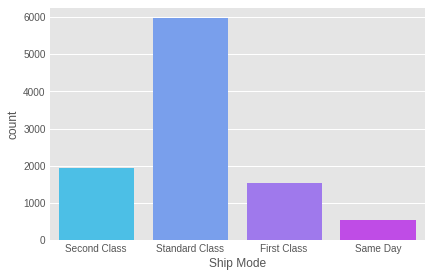

In [ ]:
sns.countplot(dataset['Ship Mode'], palette='cool')

Problem #1 - The maximum number of shipping is of Standard Class.


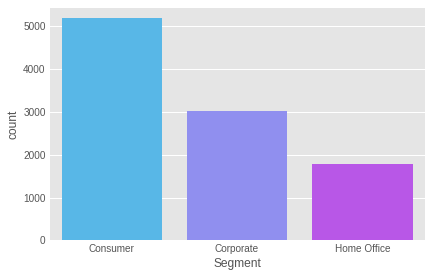

In [ ]:
sns.countplot(dataset['Segment'], palette='cool')

Problem #2 - Less sale in Home and Offices sector.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

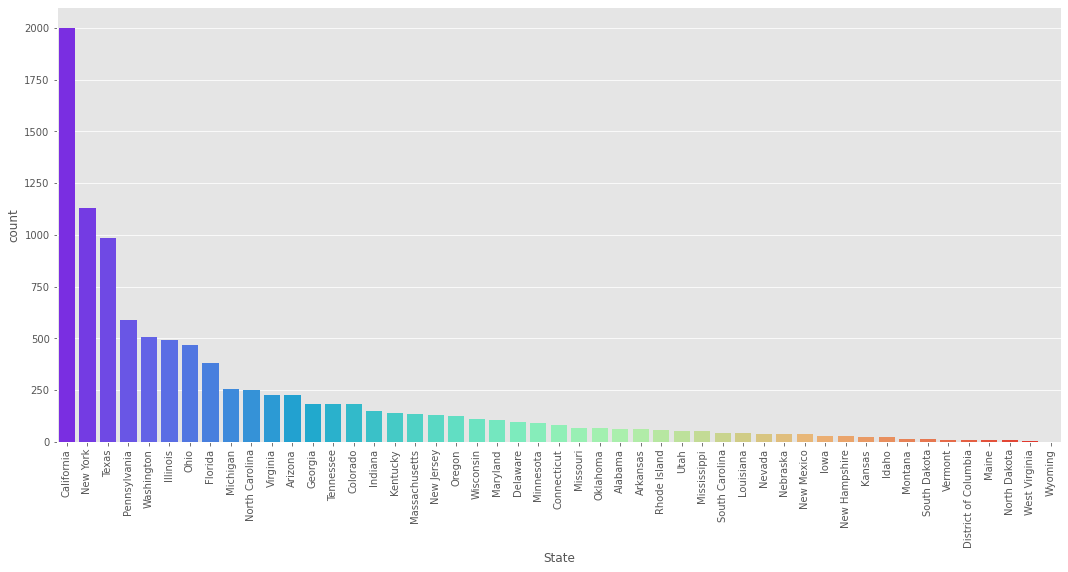

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(dataset['State'], palette='rainbow',order=dataset['State'].value_counts().index)
plt.xticks(rotation=90)

High Sale in California, New York and Texas.

Probem #3 - Sale is less in other States.


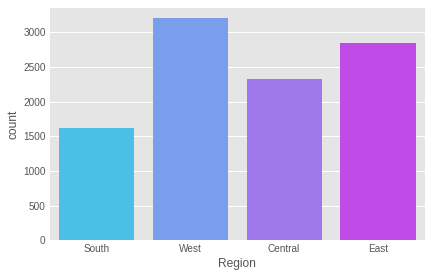

In [ ]:
sns.countplot(dataset['Region'], palette='cool')

Max Sale in west and East.

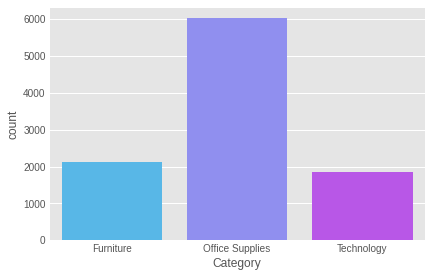

In [ ]:
sns.countplot(dataset['Category'], palette='cool')

Problem #4 - Customers buy less products of Furniture and Tehchnology.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

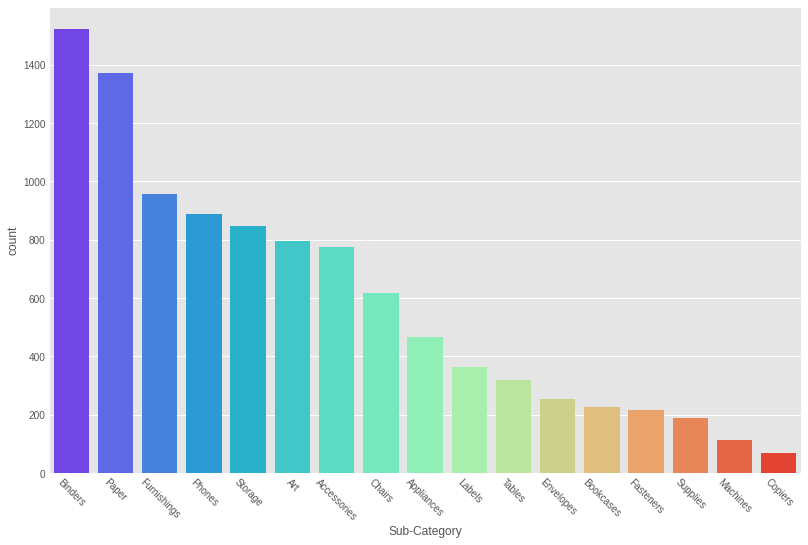

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(dataset['Sub-Category'], palette='rainbow',order=dataset['Sub-Category'].value_counts().index)
plt.xticks(rotation=-45)

Problem #5 - Less buyers in 'Envelopes',
       'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers'.

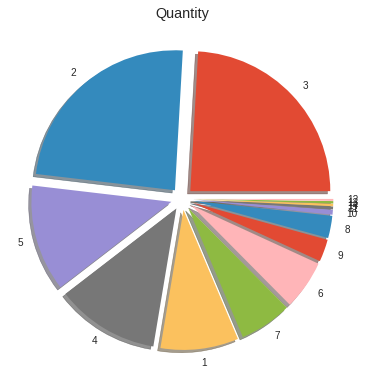

In [ ]:
plt.figure(figsize=(6,6))
ex = [0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]
labels=[3,2,5,4,1,7,6,9,8,10,11,14,13,12]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(dataset['Quantity'].value_counts(), labels=labels, explode= ex, shadow=True)
plt.title('Quantity')
plt.show()

Customers generally buy in 2 or 3 quantities.

Text(0.5, 1.0, 'Profit per Category')

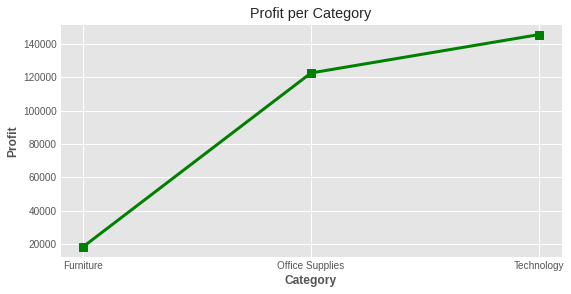

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dataset.groupby('Category')[['Profit']].sum(), marker = 's', markersize=8, color='g', linewidth='3')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.title('Profit per Category')

Problem #6 - Company gains less profit in Furniture.

Text(0.5, 1.0, 'Profit per Region')

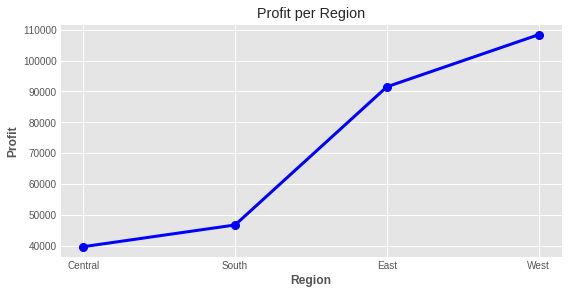

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dataset.groupby('Region')[['Profit']].sum().sort_values(by='Profit'), marker = 'o', markersize=8, color='b', linewidth='3')
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Profit', fontweight='bold')
plt.title('Profit per Region')

Problem #7 - Less profit in Central and South region.

Text(0.5, 1.0, 'Profit/Loss per Sub-Category')

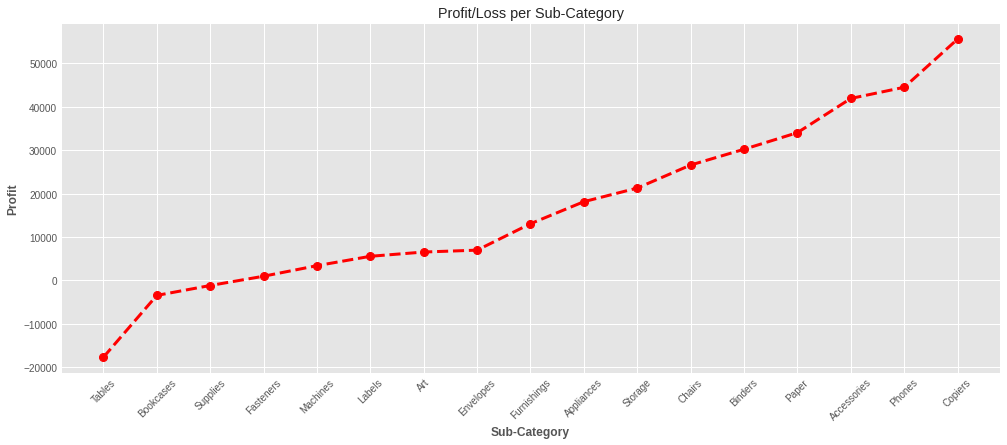

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dataset.groupby('Sub-Category')[['Profit']].sum().sort_values(by='Profit'),
        marker = 'o', markersize=8, color='r', linewidth='3', linestyle='--')
plt.xlabel('Sub-Category', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Profit', fontweight='bold')
plt.title('Profit/Loss per Sub-Category')

Problem #8 - Profit in  'Envelopes', 'Bookcases', 'Fasteners', 'Supplies', 'Machines', 'Copiers' is very less.

## Things company can do to work on weak areas.
*   Provide **Same Day** shipping, with reasonable shipping charges.
*   **Home** and **Offices** sale must increase.
*   Products should reach to other **States** as well.
*   Sale of **Furniture** and **Technology** must be increased.
*   Find more buyers of **Envelopes, Bookcases, Fasteners, Supplies, Machines, Copiers**.